In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

import pandas as pd

from PIL import Image

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [24]:
# load the model
vgg = models.vgg19()
vgg.classifier[6] = nn.Linear(4096, 100)
vgg.load_state_dict(torch.load(r'D:\Project\Python\NeurNet\CNN\outputs\vgg19_test.pth')['model_state_dict'])
vgg.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [25]:
trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])


In [41]:
def predict(path, species, num):
    img = Image.open(f'{path}\\{species}\\{num}.jpg')
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.show()

    img = trans(img)
    img = img
    img = img.unsqueeze(0)
    
    output = vgg(img)
    prob = F.softmax(output,dim=1)
    
    value, predicted = torch.max(output.data, 1)
#     print(predicted.item())
    

#     print(value)
    
    return predicted.item()

In [42]:
path = r'D:\Project\Python\NeurNet\archive\valid'
num = '1'

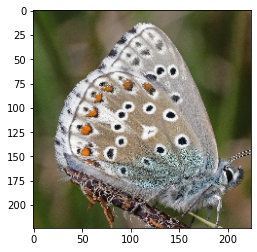

Origin species: ADONIS
Predicted result: GREY HAIRSTREAK


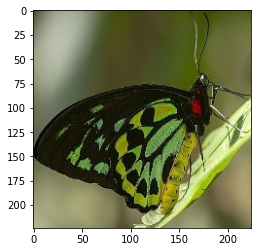

Origin species: CAIRNS BIRDWING
Predicted result: CAIRNS BIRDWING


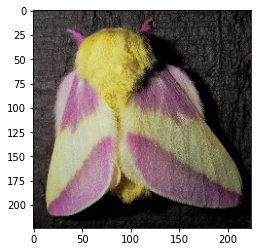

Origin species: ROSY MAPLE MOTH
Predicted result: ROSY MAPLE MOTH


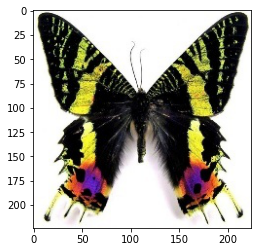

Origin species: MADAGASCAN SUNSET MOTH
Predicted result: MADAGASCAN SUNSET MOTH


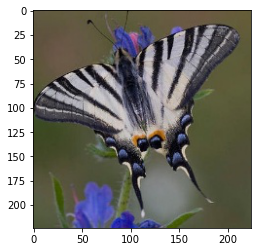

Origin species: SCARCE SWALLOW
Predicted result: SCARCE SWALLOW


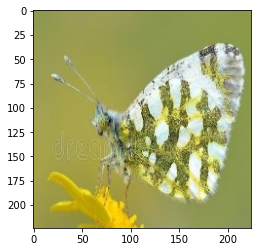

Origin species: EASTERN DAPPLE WHITE
Predicted result: EASTERN DAPPLE WHITE


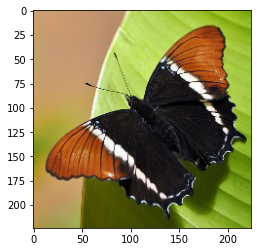

Origin species: BROWN SIPROETA
Predicted result: BROWN SIPROETA


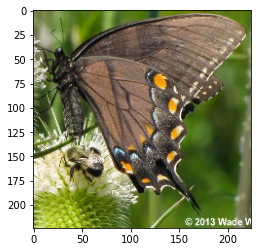

Origin species: YELLOW SWALLOW TAIL
Predicted result: YELLOW SWALLOW TAIL


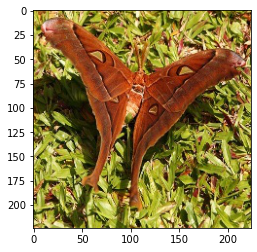

Origin species: HERCULES MOTH
Predicted result: HERCULES MOTH


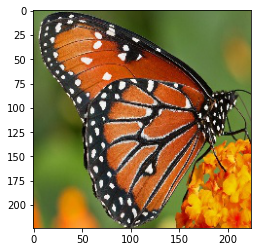

Origin species: STRAITED QUEEN
Predicted result: STRAITED QUEEN


In [43]:
import numpy as np
array = np.random.randint(100, size = 10)
df = pd.read_csv(r'D:/Project/Python/NeurNet/archive/BUTTERFLIES.csv')
classes_name = df[df['data set'] == 'valid']['labels'].unique()

for i in array:
    print(f"Origin species: {classes_name[i]}\nPredicted result: {classes_name[predict(path, classes_name[i], num)]}")